**<h1> Código Informe Ejecutivo <h1>**

<h1>Contexto</h1>


Sergio Palencia es el dueño de Orange, una compañía de teléfonos móviles creada a mitad del año 2023, sin embargo, su marca aún no se encuentra en el mercado debido a que aún no sabe cómo estimar los precios los móviles que la compañía crea, además para este negocio se necesita tener en cuenta un análisis de entorno, ya que Sergio quiere competir con las grandes compañías como Apple, Samsung y Huawei. 

Para poder estimar los precios, la compañía de Sergio ha recopilado datos de ventas de teléfonos de diferentes compañías.  Así mismo, se realizará un modelo de regresión logística y KNN para identificar los rangos de precio que indique cuan alto es el precio y así poder establecer los teléfonos en uno de estos, se identificará las relaciones que se tienen entre las características de un teléfono y su precio de venta. 

<h1>Análisis descriptivo</h1>


1. Cargar librerías necesarias

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Cargar base de datos





In [7]:
import pandas as pd
testeo = pd.read_csv(r'C:\Users\DELL\OneDrive - Universidad Sergio Arboleda\TOMA 2\informetoma2\telefono.csv')
df = pd.read_csv(r'C:\Users\DELL\OneDrive - Universidad Sergio Arboleda\TOMA 2\informetoma2\telfonico.csv')

print(testeo.shape)
print(df.shape)

(1000, 21)
(2000, 21)


Para realizar el modelo, se utilizarán 1 base de datos de entrenamiento y otra de testeo. 

La base de datos de entrenamiento cuenta con 2000 registros, y la base de datos de testeo cuenta con 1000 registros.

Esto será útil para evitar el sobreajuste, y para desempeñarse correctamente en datos nuevos, no vistos, como en situaciones reales. 

Cabe resaltar, que la data ya se encontraba dividida desde su descarga, sin embargo, se podría realizar utilizando  train_test_split de scikit-learn.

3. Descripción de variables 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Se puede observar las siguientes variables: 

**battery_power:** Energía total que una batería puede almacenar en un solo tiempo medido en mAh


**blue:** Indica si el teléfono tiene capacidad Bluetooth (1 si tiene, 0 si no).


**clock_speed:** La velocidad del procesador del teléfono en GHz (gigahercios).


**dual_sim:** Indica si el teléfono tiene capacidad para dos tarjetas SIM (1 si tiene, 0 si no).


**fc:** La cantidad de megapíxeles de la cámara frontal del teléfono.


**four_g:** Indica si el teléfono es compatible con redes 4G (1 si es compatible, 0 si no).


**int_memory:** La cantidad de memoria interna del teléfono, medida en GB (gigabytes).


**m_dep:** La profundidad del teléfono en cm (centímetros).


**mobile_wt:** El peso del teléfono en gramos.


**n_cores:** El número de núcleos del procesador del teléfono.


**pc:** La cantidad de megapíxeles de la cámara principal del teléfono.


**px_height:** La altura de resolución de la pantalla del teléfono en píxeles.


**px_width:** La anchura de resolución de la pantalla del teléfono en píxeles.


**ram:** La cantidad de memoria RAM del teléfono, medida en MB (megabytes).


**sc_h:** La altura de la pantalla del teléfono en cm (centímetros).


**sc_w:** La anchura de la pantalla del teléfono en cm (centímetros).


**talk_time:** La duración de la batería en tiempo de conversación en horas.


**three_g:** Indica si el teléfono es compatible con redes 3G (1 si es compatible, 0 si no).


**touch_screen:** Indica si el teléfono tiene pantalla táctil (1 si tiene, 0 si no).


**wifi:** Indica si el teléfono tiene capacidad de conexión Wi-Fi (1 si tiene, 0 si no).


**price_range:** Esta es la variable objetivo con un valor de 0 (costo bajo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

In [9]:
testeo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Como se puede observar en la base de datos de testeo no se encuentra la variable de salida, que es price_range, es decir con esta se va a observar si el modelo es útil y su capacidad de clasificación. 
Además tiene la columna de id, la cual se eliminará.

In [10]:
testeo.drop(columns = ['id'], inplace = True)

In [11]:
testeo.shape

(1000, 20)

4. EDA

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Se puede observar como como para la altura y el ancho de los celulares, están establecidas por un rango bastante amplio. <br>
También los megapixeles y se puede observar como van desde los 5 a los 20 y su capacidad de batería. <br>
Esto es importante destacarlo ya que puede que por estas características estarán establecidos su rango de precios.

A continuación queremos entender el comportamiento de las variables categóricas viendo los valores únicos para así comprender que tantas categorías tienen estas variables y comprender el contexto de las mismas.

In [13]:
print("\nValores únicos en cada columna:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Columna {column}: {unique_values}")


Valores únicos en cada columna:
Columna battery_power: [ 842 1021  563 ... 1139 1467  858]
Columna blue: [0 1]
Columna clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Columna dual_sim: [0 1]
Columna fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Columna four_g: [0 1]
Columna int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Columna m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Columna mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 17

In [14]:
conteo_unicos = df.nunique()

conteo_unicos_df = conteo_unicos.reset_index()
conteo_unicos_df.columns = ['Columna', 'Conteo de Valores Únicos']

print(conteo_unicos_df)

          Columna  Conteo de Valores Únicos
0   battery_power                      1094
1            blue                         2
2     clock_speed                        26
3        dual_sim                         2
4              fc                        20
5          four_g                         2
6      int_memory                        63
7           m_dep                        10
8       mobile_wt                       121
9         n_cores                         8
10             pc                        21
11      px_height                      1137
12       px_width                      1109
13            ram                      1562
14           sc_h                        15
15           sc_w                        19
16      talk_time                        19
17        three_g                         2
18   touch_screen                         2
19           wifi                         2
20    price_range                         4


Se observa como las columnas de three_g, touch_scree, wifi, blue, dual_sim, four_g, son columnas binarias (Si= 1, No= 0) <br>
Además que las características que más varian entre un teléfono y otro son: ram, px_width, px_height, mobile_wt y battery_power.

In [15]:
#Datos nulos
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None) 

print("Datos nulos entrenamiento")
print(df.isnull().sum())
print("Datos nulos testeo")
print(testeo.isnull().sum())

Datos nulos entrenamiento
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Datos nulos testeo
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


### Box Plot

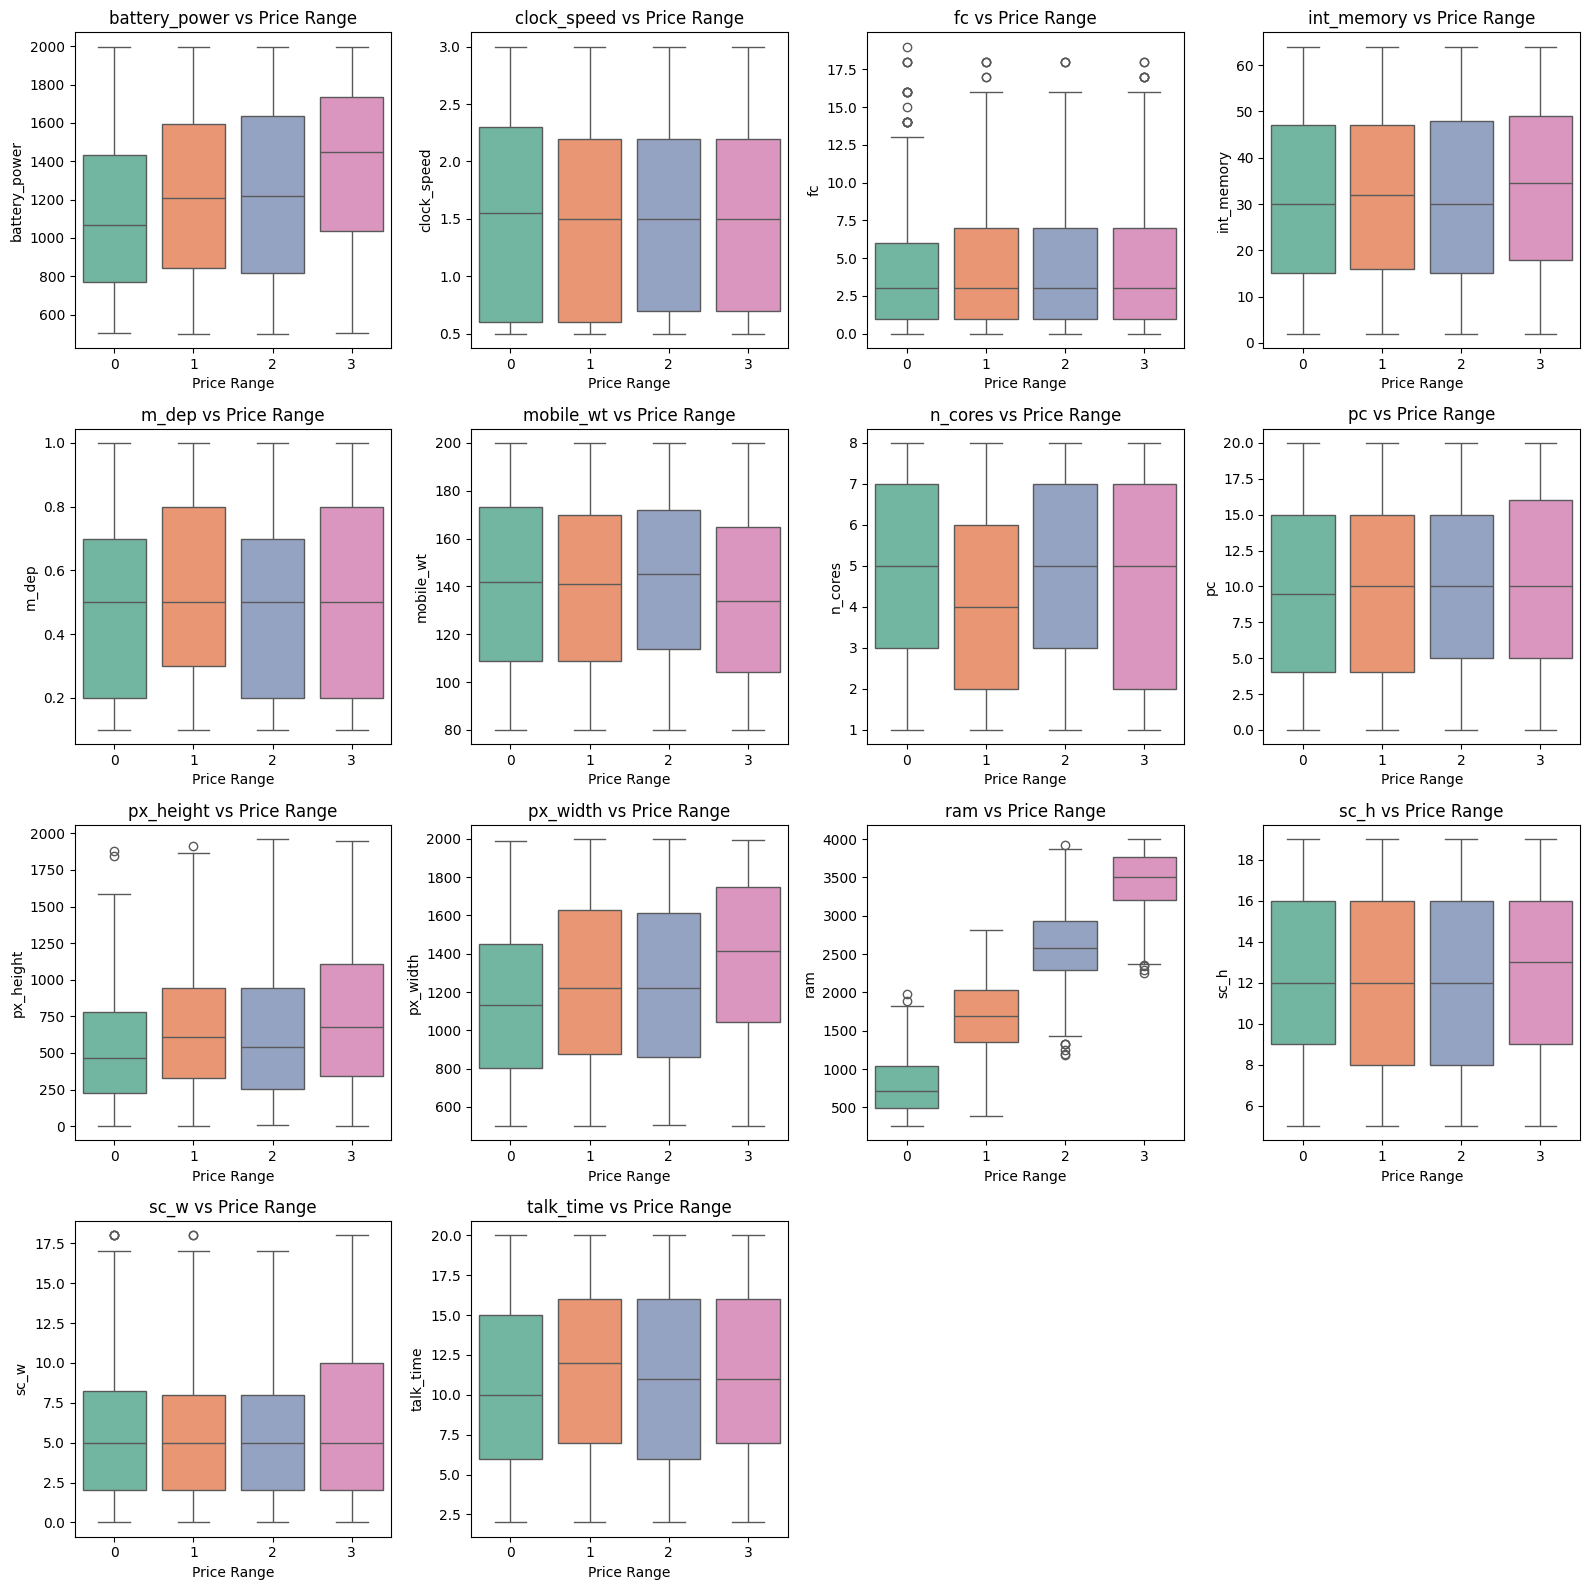

In [19]:
import math
# Seleccionar las columnas numéricas que se desean graficar
columnas_numericas = [ 'battery_power', 'clock_speed', 'fc', 
    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 
    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']

data_filtered = df[columnas_numericas]


# Calcular el número adecuado de filas y columnas para los subgráficos
num_vars = len(columnas_numericas) - 1  # Excluir 'price_range'
num_cols = 4  # Número deseado de columnas
num_rows = math.ceil(num_vars / num_cols)  # Calcular el número necesario de filas

# Configurar el tamaño de la figura
plt.figure(figsize=(16, num_rows * 4))  # Ajustar altura según el número de filas

palette = sns.color_palette("Set2", len(entrenamiento['price_range'].unique()))
# Iterar sobre cada variable numérica y graficar
for i, col in enumerate(columnas_numericas[:-1]):  # Excluir 'price_range'
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='price_range', y=col, data=data_filtered, palette=palette)
    plt.title(f'{col} vs Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede observar como las siguientes variables son las que más cambian según el precio: "ram", "px_height" y "px_width" en donde la categoría de costo alto y costo medio tienen un comportamiento muy similar, "battery_power".

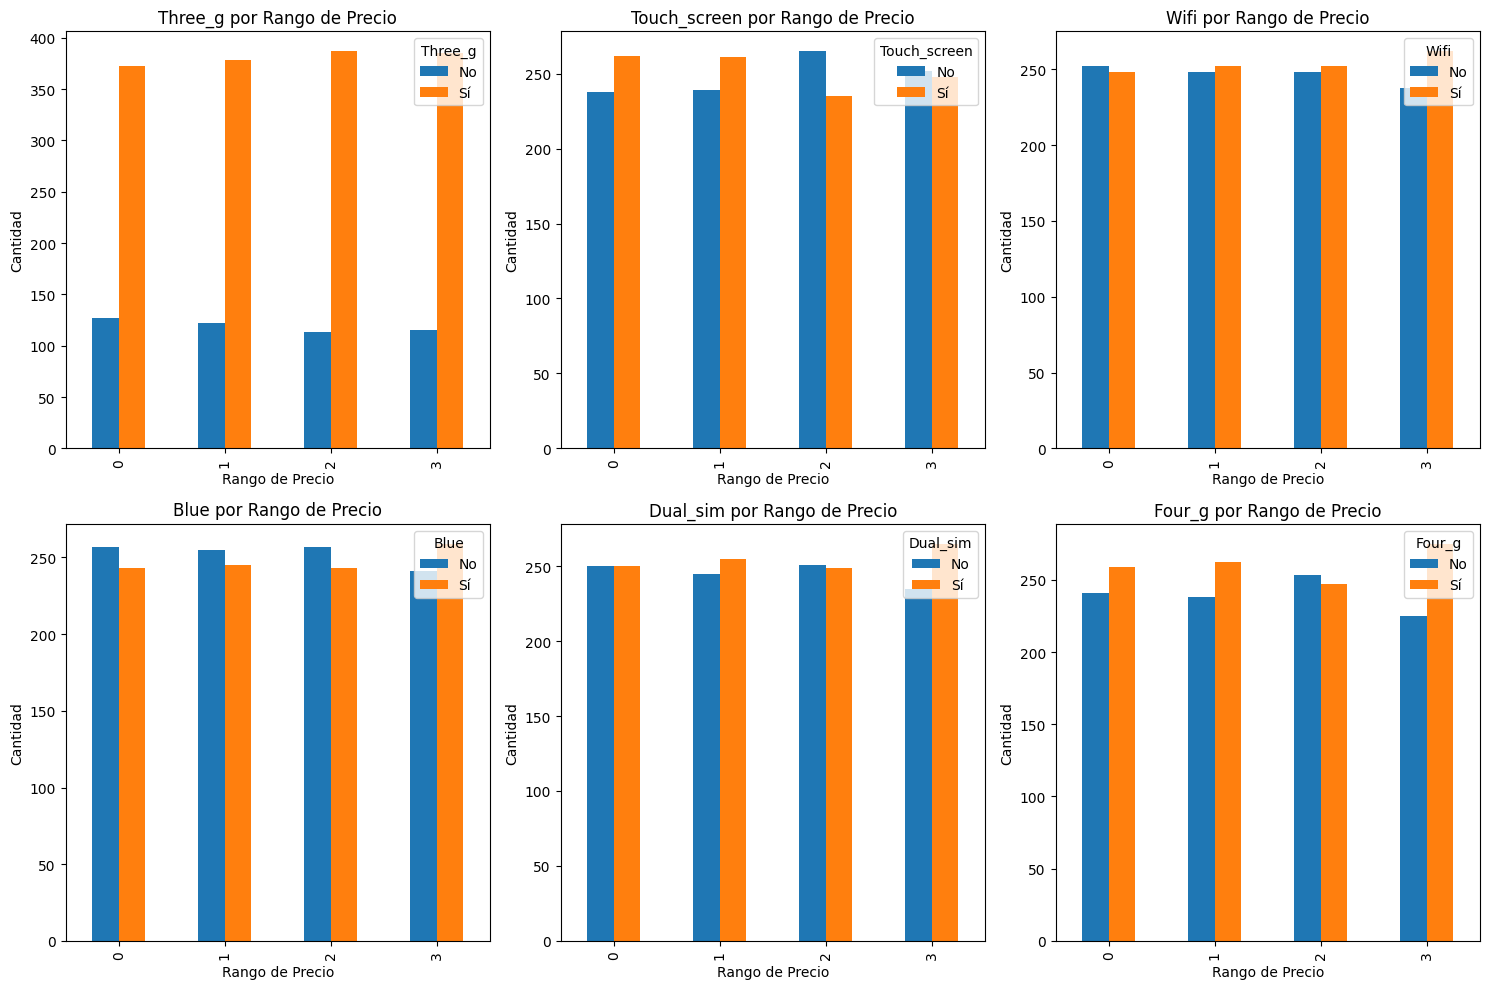

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de ejemplo (simulados)
binarias = [ 'three_g', 'touch_screen', 'wifi', 
    'blue', 'dual_sim', 'four_g']



fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3) 

for i, var in enumerate(binarias):
    row = i // 3
    col = i % 3
    
    # Agrupar y contar por 'price_range' y la variable binaria actual
    grouped_data = df.groupby(['price_range', var]).size().unstack()
    
    # Graficar el gráfico de barras
    grouped_data.plot(kind='bar', ax=axes[row, col], legend=False)
    
    # Personalización del gráfico en español
    axes[row, col].set_xlabel('Rango de Precio')
    axes[row, col].set_ylabel('Cantidad')
    axes[row, col].set_title(f'{var.capitalize()} por Rango de Precio')
    axes[row, col].legend(title=var.capitalize(), loc='upper right', labels=['No', 'Sí'])

# Mostrar la figura
plt.tight_layout()
plt.show()

Con esta gráfica se puede inferir lo siguiente:
- La mayoría de teléfonos sin importar el precio son capaces de recibir red 3G.
- Hay muchos teléfonos que no son táctiles, es decir esta base de datos puede tratarse de una base antigua. Además es extraño ver que hay más teléfonos sin touch en los rangos de precio medio alto y alto. 
- También hay más telefonos con wifi desde la categoría de precio alto, sin embargo, en estas categorías sigue existiendo una gran cantidad de teléfonos sin Wi-Fi.
- Lo mismo ocurre con el bluetooth, que hay más teléfonos sin este, y únicamnete en la categoría de precio muy alto se observa como son más lo steléfonos con bluetooth. 
- Los teléfonos dual_sim en su mayoría se encuentran en los precios muy altos. Pero al parecer no es tan característico de esta categoría. 
- En la categoría de 4G, es más notoria la diferencia entre tener y no tener la tecnología 4G.

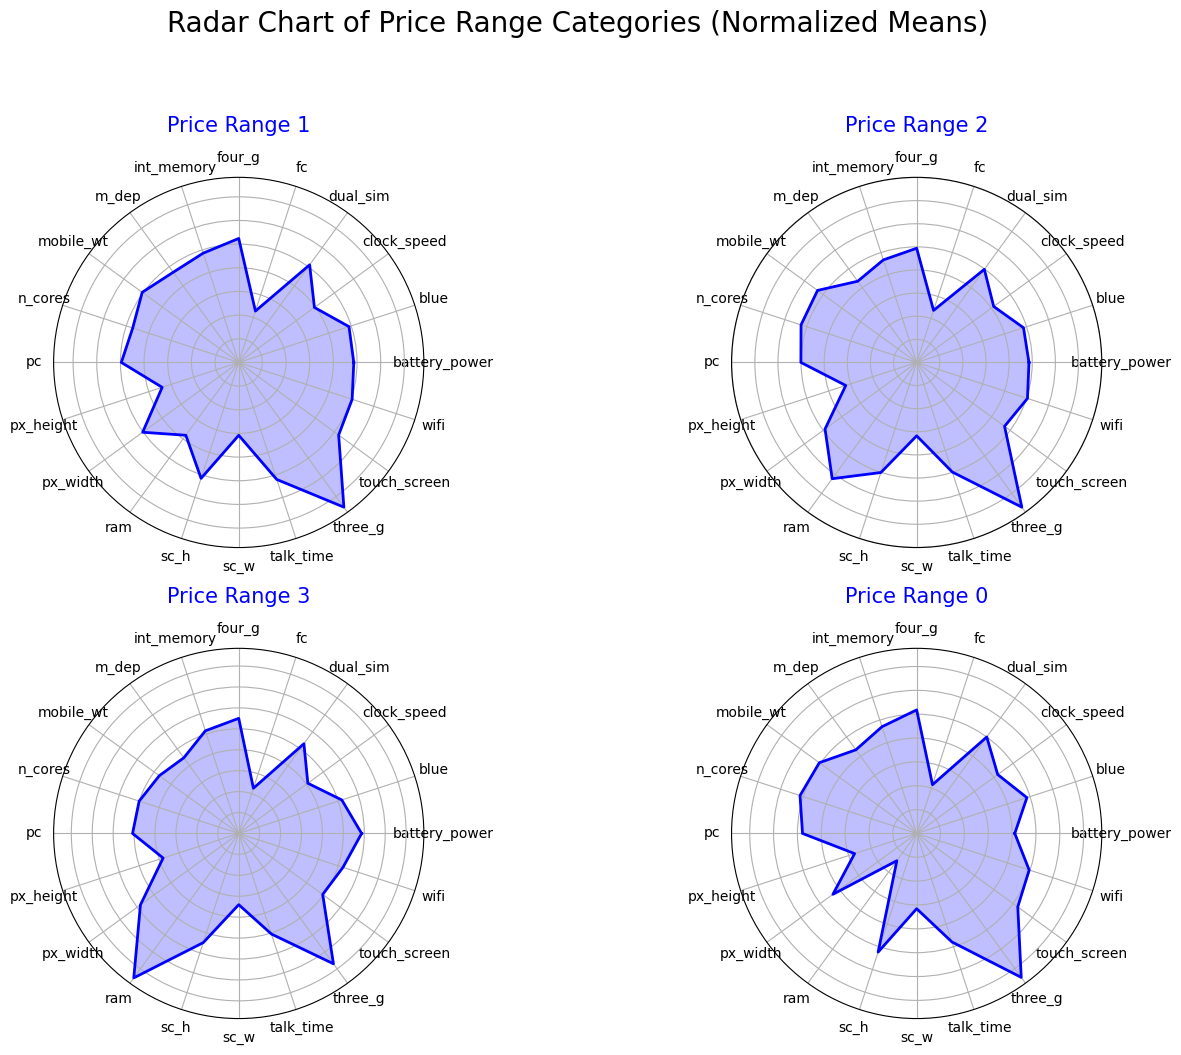

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df cargado
# df = pd.read_csv('ruta/a/tu/archivo.csv')

# Normalizar los datos para compararlos en el radar chart
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Normalizar los datos excepto la columna 'price_range'
df_normalized = df.copy()
features = df.columns.drop('price_range')
df_normalized[features] = normalize(df[features])

# Crear un radar chart para cada categoría de 'price_range'
categories = df['price_range'].unique()
num_vars = len(features)

# Angulos para el radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(14, 10))

for i, ax in enumerate(axs.flatten()):
    category = categories[i]
    data = df_normalized[df_normalized['price_range'] == category][features].mean().tolist()
    data += data[:1]  # Cerrar el círculo

    ax.fill(angles, data, color='b', alpha=0.25)
    ax.plot(angles, data, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)

    ax.set_title(f'Price Range {category}', size=15, color='b', y=1.1)

plt.suptitle('Radar Chart of Price Range Categories (Normalized Means)', size=20, y=1.05)
plt.tight_layout()
plt.show()


**<h1>Entendimiento del negocio y/o los productos</h1>**

**Productos de gama baja (price range 0):** Los productos de esta gama son teléfonos con poca batería, una capacidad de memoria RAM casi mínima para el funcionamiento del teléfono, más número de núcleos, lo que puede referirse a que son teléfonos con procesadores que requieren más ayuda para funcionar bien. Poseen poca memoria interna y menor resolución en la pantalla.

**Productos de gama media (price range 1):** Estos teléfonos destacan en que poseen claramente más RAM que la gama baja, además de ser un poco más pesados, manteniendo el mismo número de núcleos del procesador y más poder en la batería.

**Productos de gama alta (price range 2):** Estos teléfonos son más delgados que los de la gama media y baja. Además, la batería se mantiene en la misma media y tienen más memoria interna y RAM.

**Productos de gama premium (price range 3):** Son teléfonos con menos núcleos en los procesadores, más livianos, más memoria interna, una capacidad de batería mucho más alta y una capacidad de RAM muy alta.

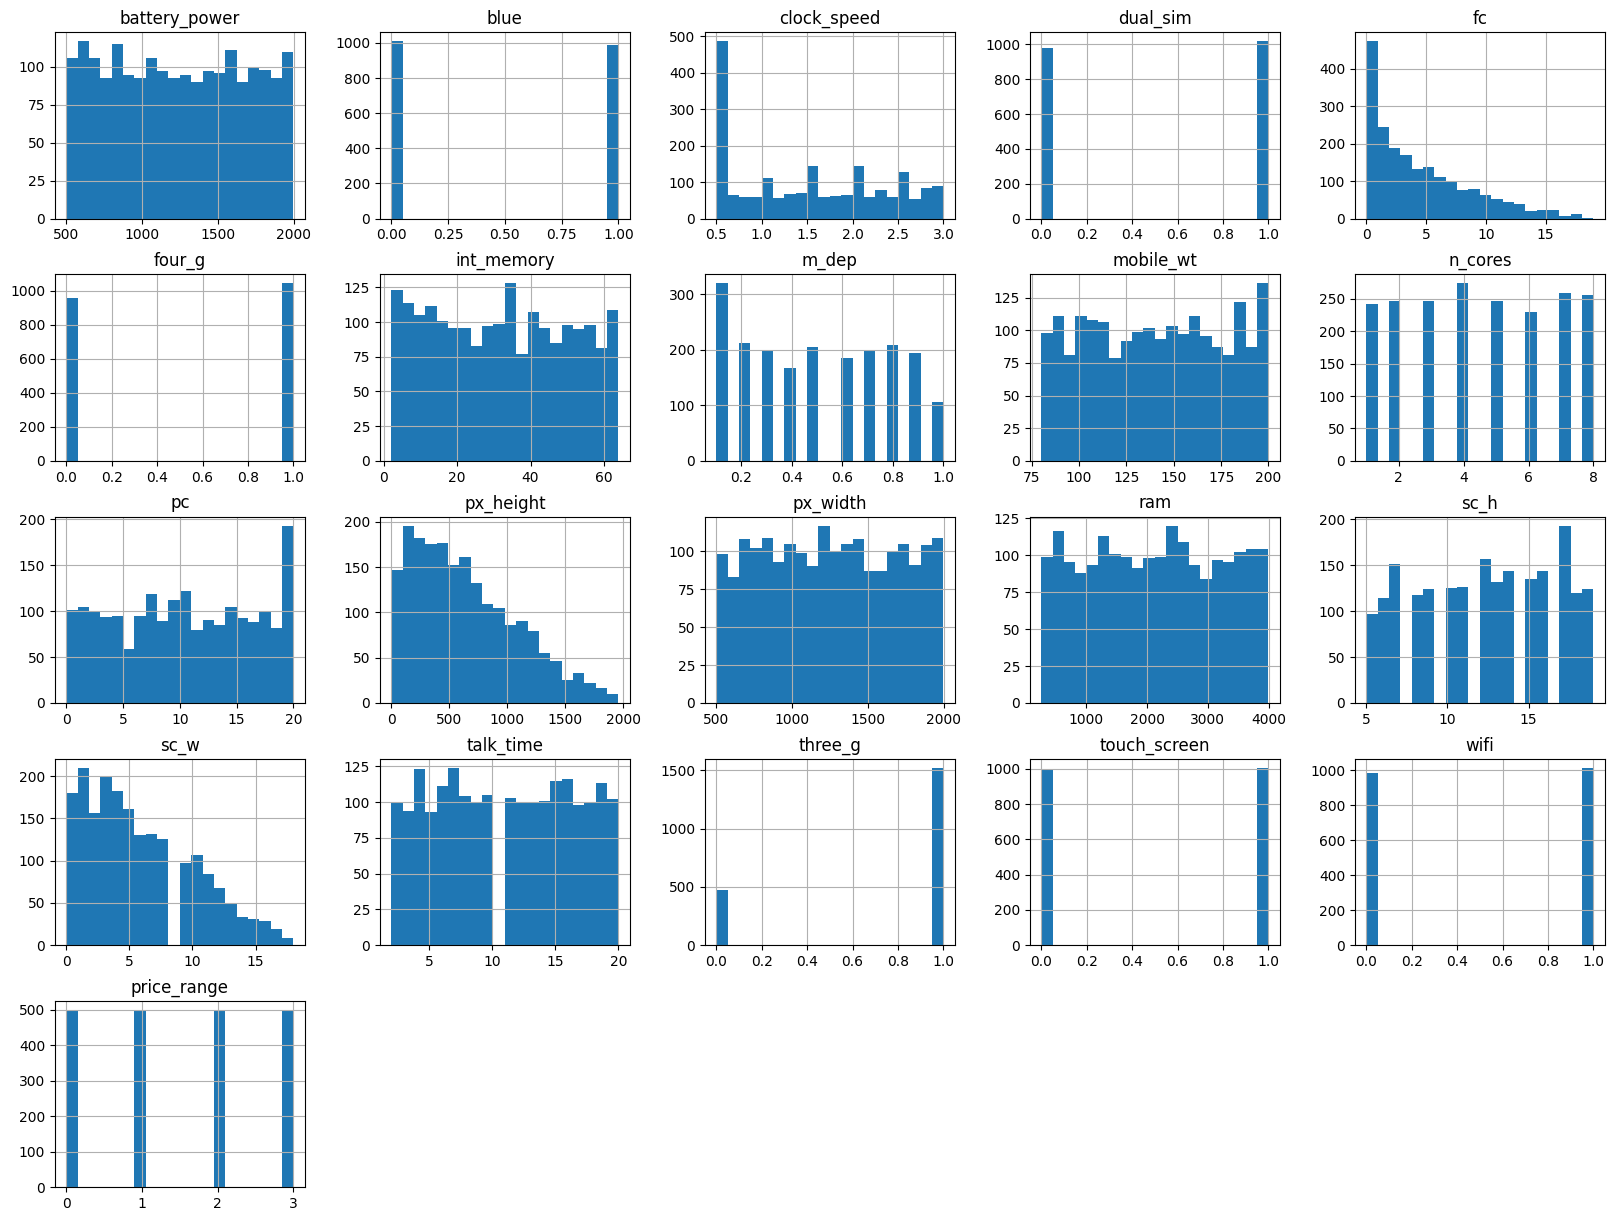

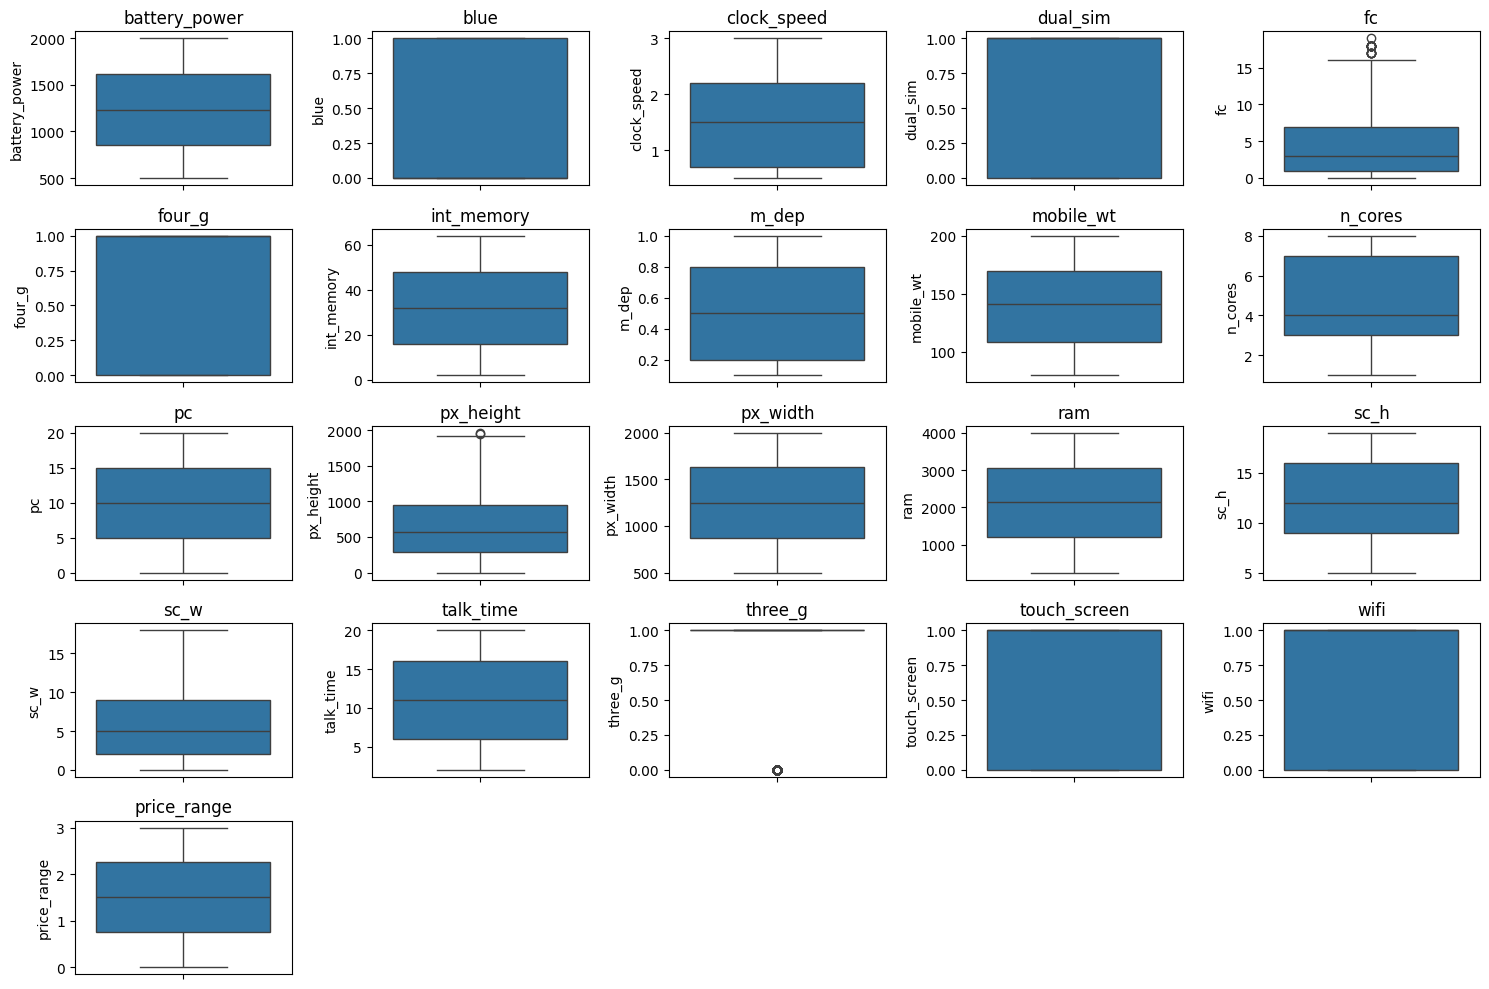

In [24]:
# Histogramas para ver la distribución
df.hist(bins=20, figsize=(20,15))
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(15,10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(5, 5, i)  # Ajustar según la cantidad de columnas
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

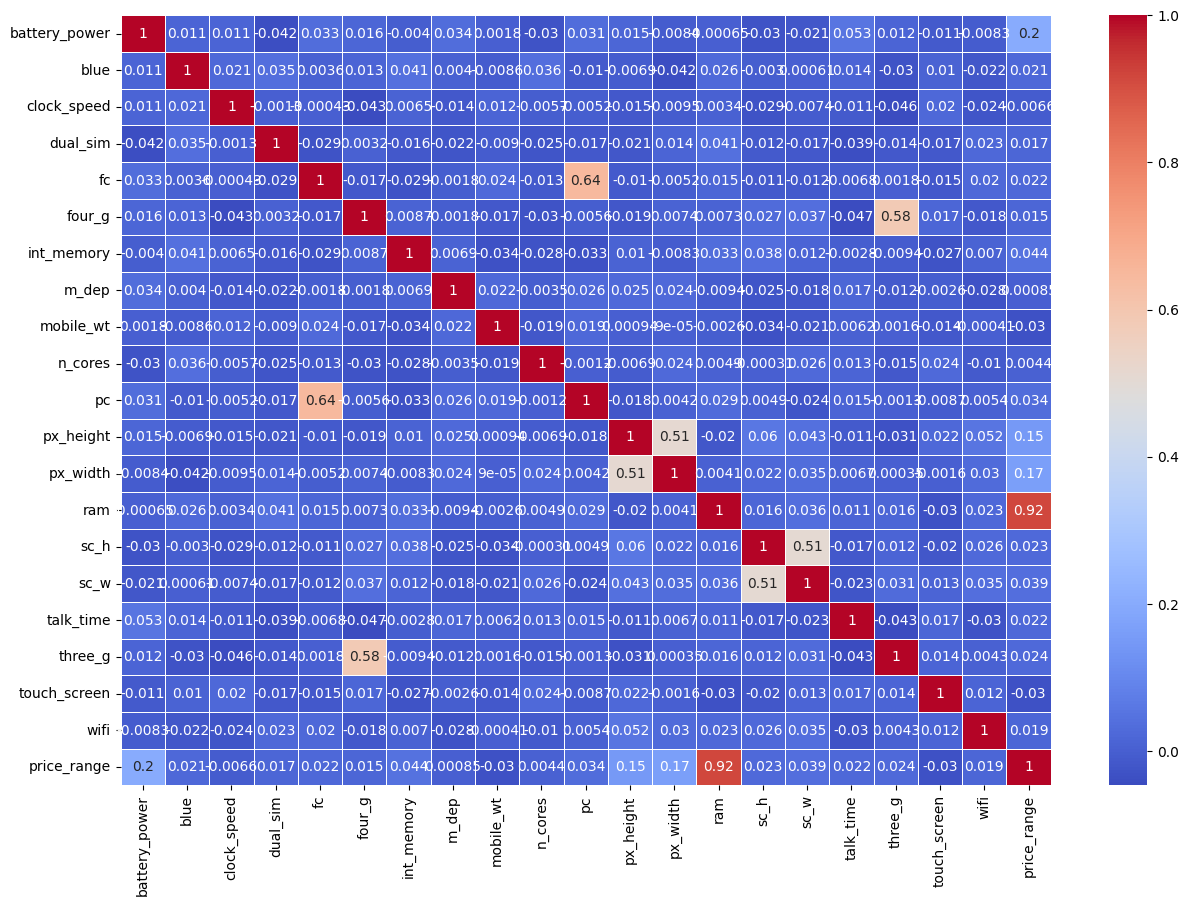

In [934]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [935]:
y = df['price_range']
X = df.drop(columns=['price_range', 'blue', 'dual_sim', 'touch_screen', 'wifi','clock_speed','m_dep','touch_screen','wifi'])

In [936]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
lr = LogisticRegression(random_state = 42)

In [937]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [938]:
y_pred_lr = lr.predict(X_test)

In [939]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)

In [940]:
accuracy

0.62

Hasta este punto podemos comprender como el mejor  valor con el estado actual de los datos es de 64% de  precision para el modelo , podemos concluir de esto que puede deberse al estado de los datos asi que trataremos de eliminar atipicos de algunas variables cpn alta correlacion para normalizar sus distribuciones 


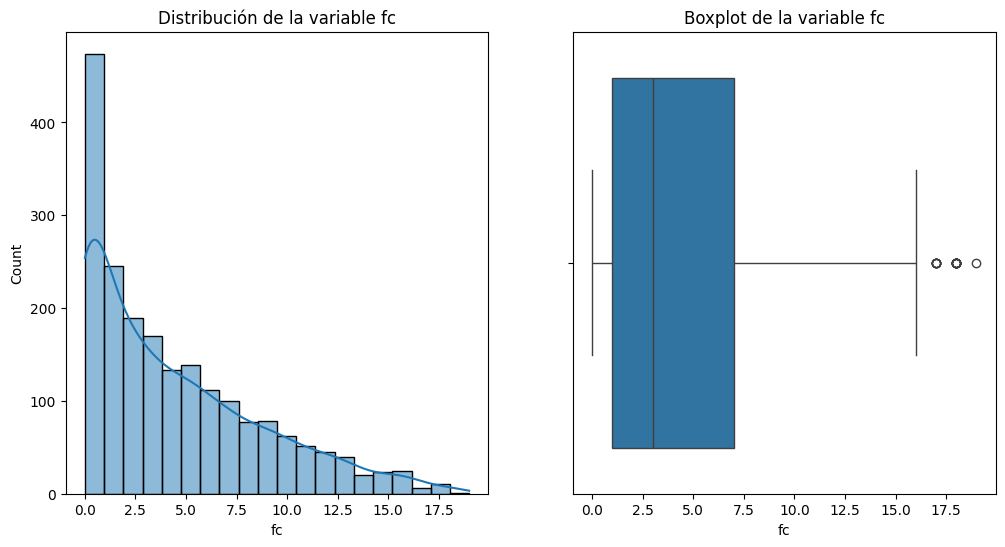

In [941]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes el DataFrame cargado como df
# df = pd.read_csv('data.csv')  # Si fuera necesario cargar el DataFrame desde un archivo

# Visualizar la distribución de la variable `fc`
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['fc'], bins=20, kde=True)
plt.title('Distribución de la variable fc')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['fc'])
plt.title('Boxplot de la variable fc')

plt.show()



VARIABLE PC VISUALIZACION Y TRANSFORMACION

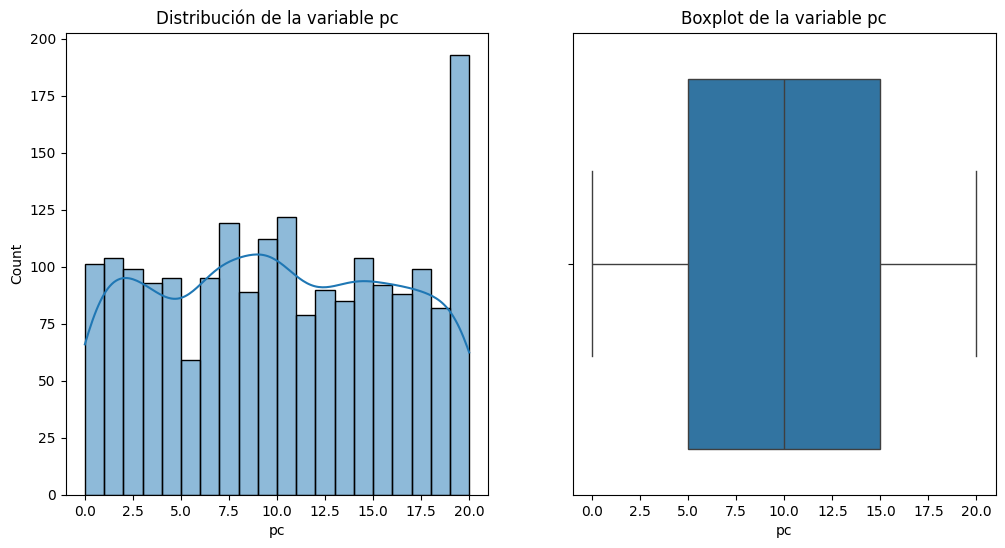

In [942]:
# Visualizar la distribución de la variable `pc`
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['pc'], bins=20, kde=True)
plt.title('Distribución de la variable pc')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['pc'])
plt.title('Boxplot de la variable pc')

plt.show()


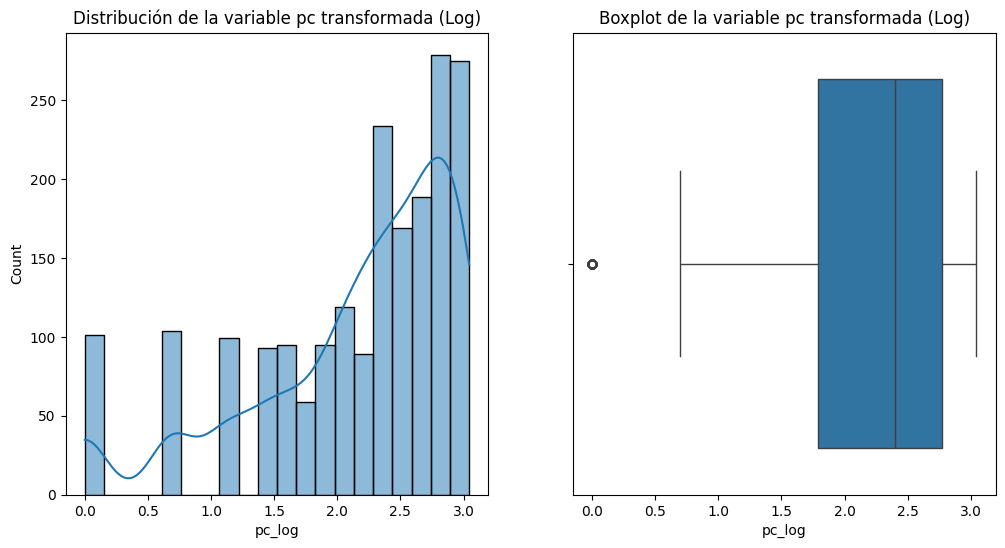

In [943]:
import numpy as np

# Verificamos si la columna 'pc' existe en el DataFrame
if 'pc' in df.columns:
    # Transformación Logarítmica
    df['pc_log'] = np.log1p(df['pc'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['pc_log'], bins=20, kde=True)
    plt.title('Distribución de la variable pc transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['pc_log'])
    plt.title('Boxplot de la variable pc transformada (Log)')

    plt.show()
else:
    print("La columna 'pc' no se encuentra en el DataFrame")




VARIABLE PX HEIGHT

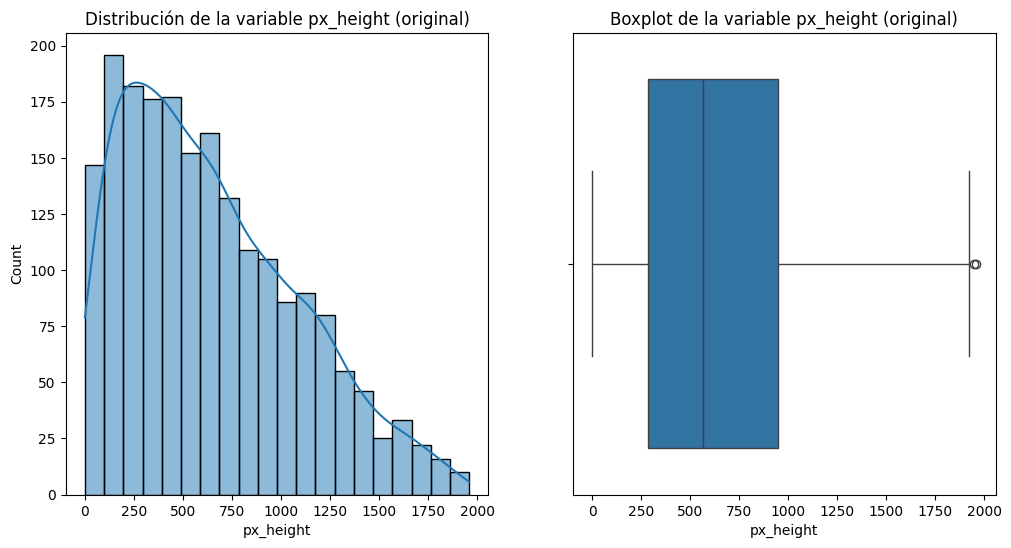

In [944]:
# Visualizar la distribución de la variable `px_height`
plt.figure(figsize=(12, 6))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df['px_height'], bins=20, kde=True)
plt.title('Distribución de la variable px_height (original)')

# Boxplot original
plt.subplot(1, 2, 2)
sns.boxplot(x=df['px_height'])
plt.title('Boxplot de la variable px_height (original)')

plt.show()

VARAIBLE PX WIDTH VISUALIZACION Y TRANSFORMACION

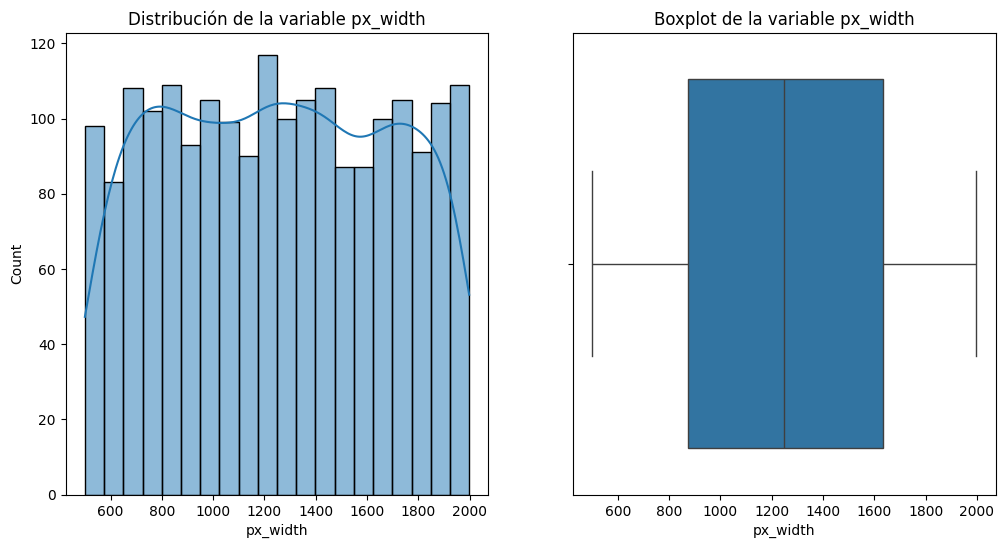

In [945]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
# Si no lo has cargado aún, puedes cargarlo así (ajusta la ruta del archivo):
# df = pd.read_csv('ruta/al/archivo.csv')

# Asegúrate de que la columna 'px_width' esté en el DataFrame
if 'px_width' in df.columns:
    plt.figure(figsize=(12, 6))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df['px_width'], bins=20, kde=True)
    plt.title('Distribución de la variable px_width')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['px_width'])
    plt.title('Boxplot de la variable px_width')

    plt.show()
else:
    print("La columna 'px_width' no se encuentra en el DataFrame")

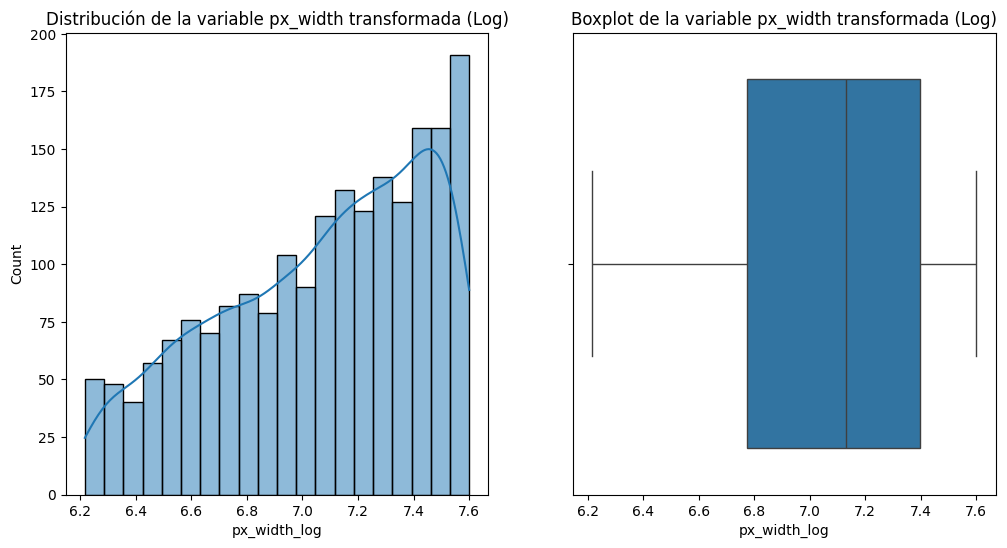

In [946]:
import numpy as np

# Verificamos si la columna 'px_width' existe en el DataFrame
if 'px_width' in df.columns:
    # Transformación Logarítmica
    df['px_width_log'] = np.log1p(df['px_width'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['px_width_log'], bins=20, kde=True)
    plt.title('Distribución de la variable px_width transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['px_width_log'])
    plt.title('Boxplot de la variable px_width transformada (Log)')

    plt.show()
else:
    print("La columna 'px_width' no se encuentra en el DataFrame")


VARIABLE RAM

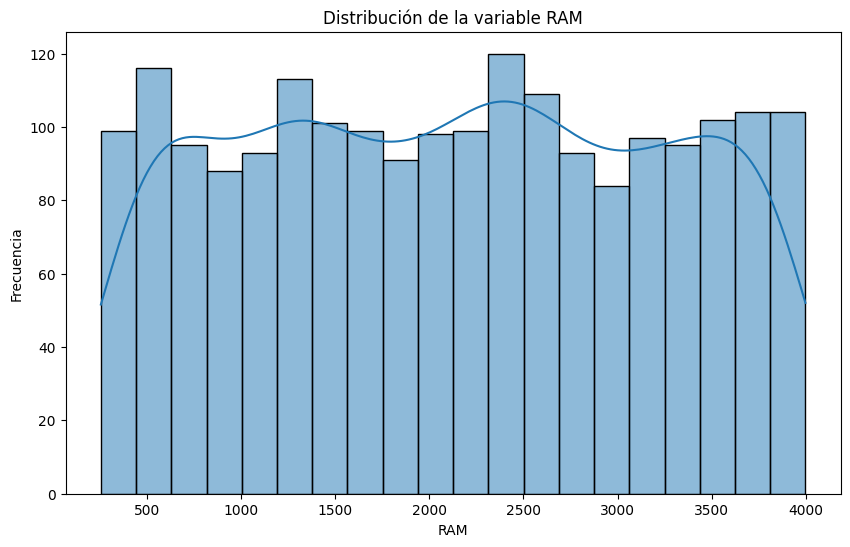

In [947]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable 'ram'
plt.figure(figsize=(10, 6))
sns.histplot(df['ram'], bins=20, kde=True)
plt.title('Distribución de la variable RAM')
plt.xlabel('RAM')
plt.ylabel('Frecuencia')
plt.show()

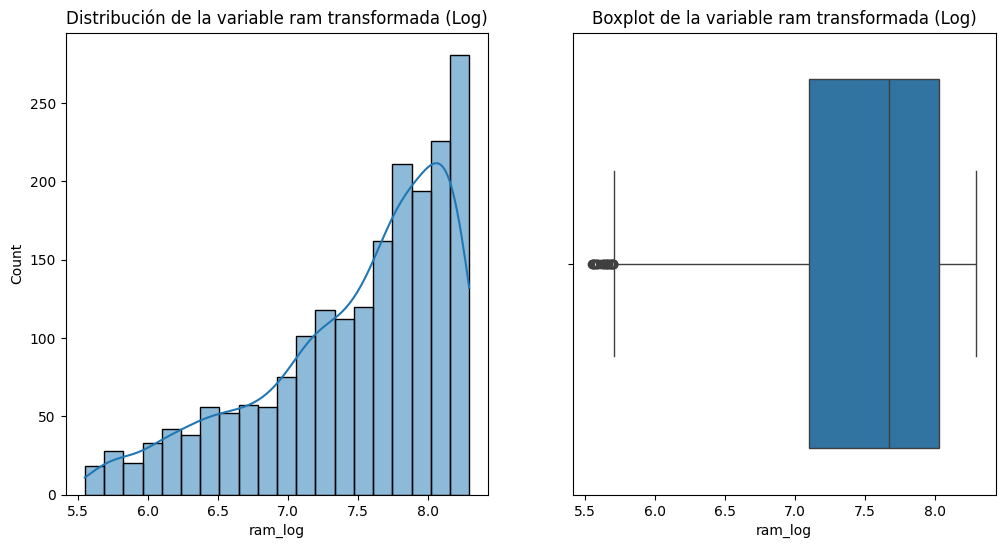

In [948]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import ndtri

# Verificamos si la columna 'ram' existe en el DataFrame
if 'ram' in df.columns:
    # Transformación Logarítmica
    df['ram_log'] = np.log1p(df['ram'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['ram_log'], bins=20, kde=True)
    plt.title('Distribución de la variable ram transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['ram_log'])
    plt.title('Boxplot de la variable ram transformada (Log)')

    plt.show()
else:
    print("La columna 'ram' no se encuentra en el DataFrame")



VARIABLE SC H 


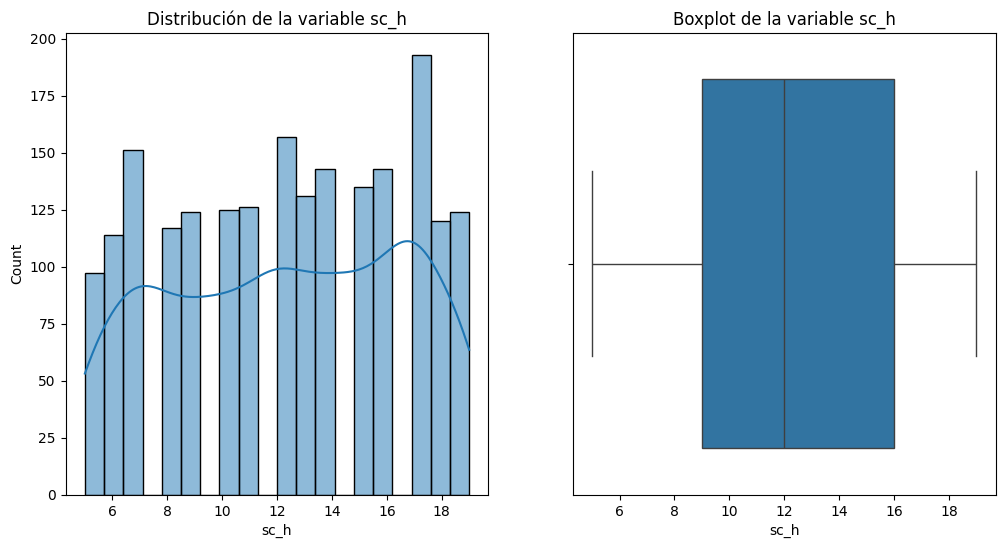

In [949]:
# Verificamos si la columna 'sc_h' existe en el DataFrame
if 'sc_h' in df.columns:
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable sc_h
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_h'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_h')

    # Boxplot de la variable sc_h
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_h'])
    plt.title('Boxplot de la variable sc_h')

    plt.show()
else:
    print("La columna 'sc_h' no se encuentra en el DataFrame")

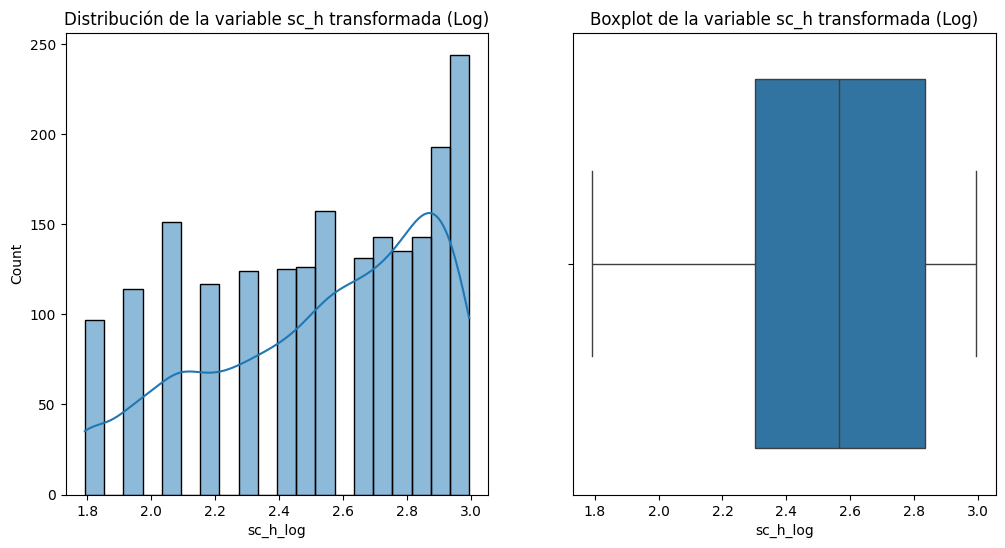

In [950]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import ndtri

# Verificamos si la columna 'sc_h' existe en el DataFrame
if 'sc_h' in df.columns:
    # Transformación Logarítmica
    df['sc_h_log'] = np.log1p(df['sc_h'])  # log1p es log(1 + x) para evitar log(0)
    
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable transformada
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_h_log'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_h transformada (Log)')

    # Boxplot de la variable transformada
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_h_log'])
    plt.title('Boxplot de la variable sc_h transformada (Log)')

    plt.show()
else:
    print("La columna 'sc_h' no se encuentra en el DataFrame")



VARIABLE SC W

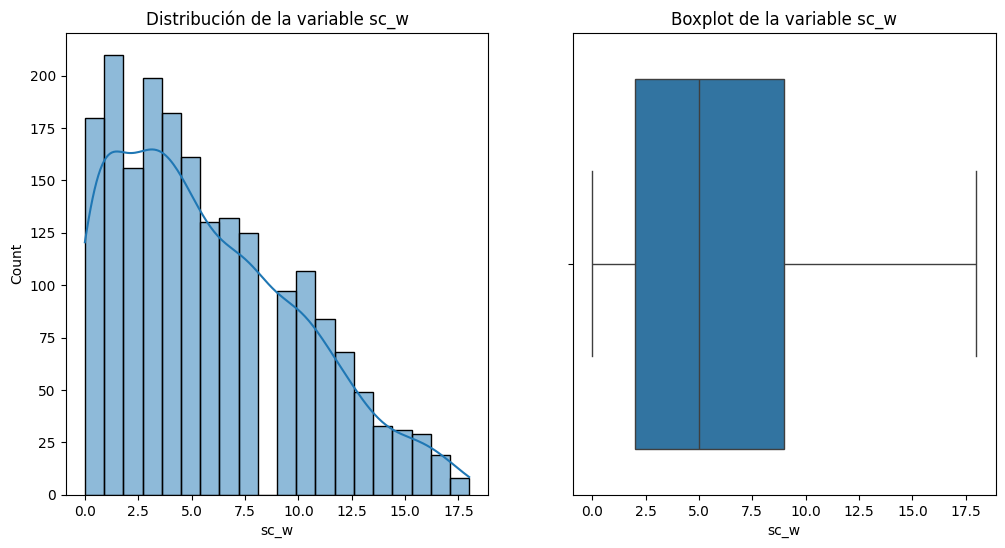

In [951]:
# Verificamos si la columna 'sc_w' existe en el DataFrame
if 'sc_w' in df.columns:
    # Visualización
    plt.figure(figsize=(12, 6))

    # Histograma con KDE de la variable sc_w
    plt.subplot(1, 2, 1)
    sns.histplot(df['sc_w'], bins=20, kde=True)
    plt.title('Distribución de la variable sc_w')

    # Boxplot de la variable sc_w
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['sc_w'])
    plt.title('Boxplot de la variable sc_w')

    plt.show()
else:
    print("La columna 'sc_w' no se encuentra en el DataFrame")

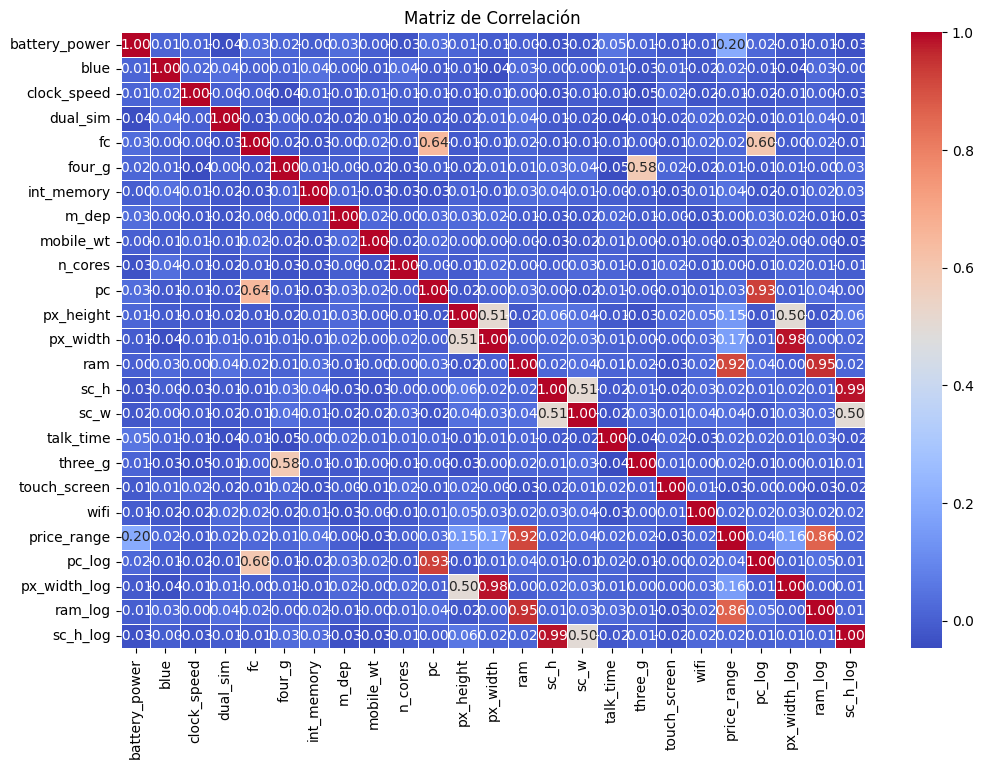

In [952]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [953]:
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'pc_log', 'px_width_log',
       'ram_log', 'sc_h_log'],
      dtype='object')


<H1>2DA Versión de modelo de regresión logística 

In [954]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Definir las características (X) y la variable objetivo (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Inicializar el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Inicializar Recursive Feature Elimination (RFE) con validación cruzada
selector = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# Entrenar el selector de características
selector = selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['ram_log', 'sc_h_log'], dtype='object')


In [955]:
y = df['price_range']
X = df.drop(columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'pc_log', 'px_width_log'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
lr = LogisticRegression(random_state = 42)



In [956]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [957]:
y_pred_lr = lr.predict(X_test)

In [958]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
accuracy

0.75

<h1>Modelo de clasificación KNN<h1/>

In [959]:
df["price_range"] = pd.qcut(df['price_range'], 4, retbins=False, labels=[1, 2, 3, 4])
df["price_range"]


0       2
1       3
2       3
3       3
4       2
       ..
1995    1
1996    3
1997    4
1998    1
1999    4
Name: price_range, Length: 2000, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [960]:
y = df['price_range']
X = df.drop([ 'pc_log', 'sc_h_log', 'px_width_log', 'ram_log', 'price_range'], axis = 1)

In [961]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [962]:
X_train


array([[-0.35934862,  0.86409244],
       [-1.26433247,  0.69115582],
       [-0.15242517,  1.02714142],
       ...,
       [ 0.73952778, -0.37768745],
       [ 0.58931925,  0.50705448],
       [-0.34872248, -2.1067387 ]])

In [963]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [964]:
y_pred = classifier.predict(X_test)

In [965]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.7266666666666667


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.62      0.60      0.61       134
           2       0.62      0.55      0.58       154
           3       0.79      0.84      0.81       147

    accuracy                           0.73       600
   macro avg       0.71      0.72      0.72       600
weighted avg       0.72      0.73      0.72       600



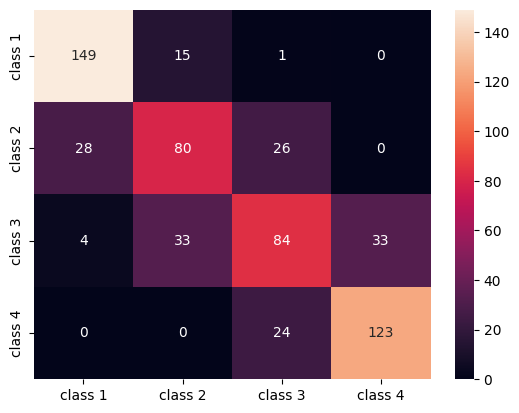

In [966]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [967]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

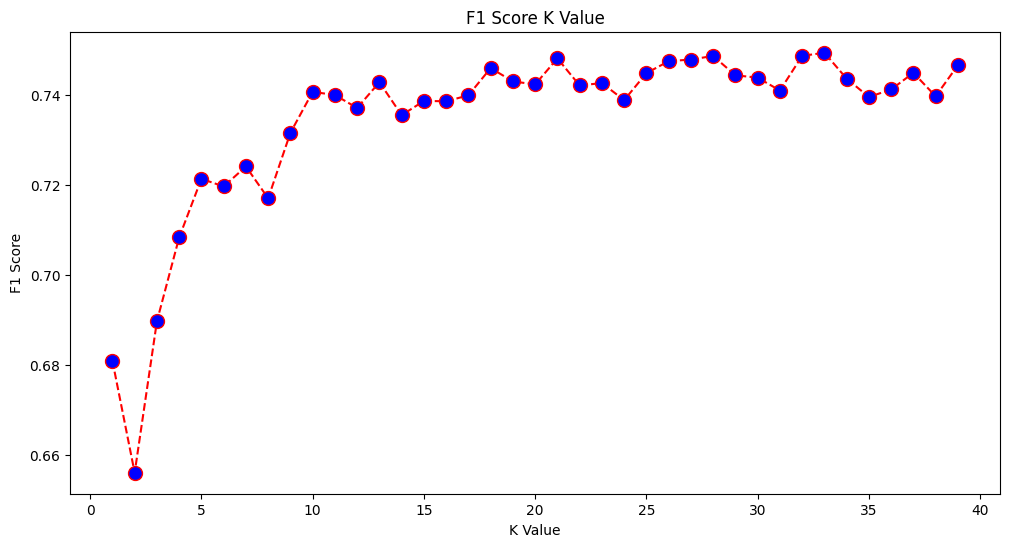

In [968]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [969]:
classifier15 = KNeighborsClassifier(n_neighbors=19)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       165
           1       0.62      0.71      0.66       134
           2       0.65      0.58      0.61       154
           3       0.80      0.82      0.81       147

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



In [970]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 19)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [971]:
distances[:3], distances.shape

(array([[0.        , 0.00213425, 0.00320251, 0.00962803, 0.01931797,
         0.02537797, 0.0631547 , 0.07319622, 0.07655832, 0.08105283,
         0.11519586, 0.16355464, 0.1649135 , 0.165708  , 0.16689181,
         0.17190215, 0.17320443, 0.17340543, 0.17507583],
        [0.        , 0.08189958, 0.0942045 , 0.18380531, 0.18426637,
         0.18958039, 0.19034395, 0.19830921, 0.20127987, 0.20589788,
         0.2062318 , 0.21354638, 0.2297227 , 0.23289356, 0.24380478,
         0.2525368 , 0.25419757, 0.25672376, 0.25799254],
        [0.        , 0.0027912 , 0.00558758, 0.00745471, 0.01571986,
         0.04125914, 0.04306691, 0.07170019, 0.07430642, 0.07435688,
         0.10240713, 0.10488698, 0.11967702, 0.15246817, 0.15470002,
         0.15755404, 0.16221884, 0.16337146, 0.17735707]]),
 (1400, 19))

In [972]:
indexes[:3], indexes[:3].shape


(array([[   0,  261,  907,  199,  337,  410,  154,  268,   92,  224,  784,
          233, 1112,  708,    3,  229,  175,  118,  285],
        [   1,  239,  631,  719, 1198, 1279,   87,  165,  768,  858, 1183,
          648,  779,  796,  561,  687,  379, 1245,  675],
        [   2,  854,  961,  220,  682,  319, 1114,  921,  521,  105,  398,
          187,  914,  229,  714,  988,  291,  767,  708]], dtype=int64),
 (3, 19))

Text(0, 0.5, 'Mean Distances')

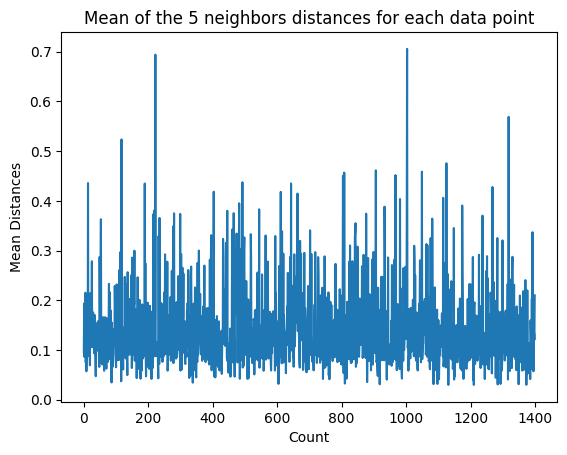

In [973]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

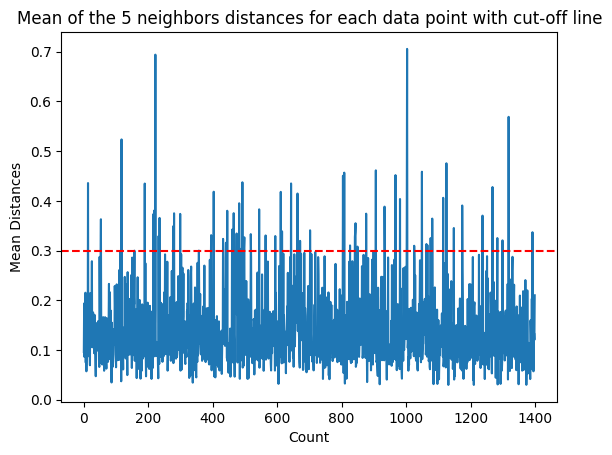

In [977]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.3, color = 'r', linestyle = '--')

In [978]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.07)
outlier_index


(array([   0,    1,    2, ..., 1397, 1398, 1399], dtype=int64),)

In [979]:
outlier_values = df.iloc[outlier_index]
outlier_values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pc_log,px_width_log,ram_log,sc_h_log
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,2,1.098612,6.629363,7.843849,2.302585
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,3,1.945910,7.595387,7.875499,2.890372
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,3,1.945910,7.448334,7.864804,2.484907
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,3,2.302585,7.488294,7.926603,2.833213
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,2,2.708050,7.100852,7.252762,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1004,0,1.6,1,0,1,30,1.0,160,8,...,4,13,1,1,1,1,0.693147,6.366470,6.920672,2.079442
1396,539,0,1.5,0,6,1,26,0.2,137,6,...,11,15,1,1,1,4,2.197225,7.444249,8.281218,2.944439
1397,717,0,1.1,1,2,1,14,0.1,99,8,...,15,20,1,0,0,1,1.945910,7.591862,6.445720,2.833213
1398,1540,0,0.7,1,0,1,29,0.1,157,7,...,8,5,1,0,0,1,0.693147,6.723832,7.057898,2.484907
